# Bubble map

Warning message:
"package 'maps' is in use and will not be installed"

package 'mapproj' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mapproj'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem z kopiowaniem C:\Users\Admin\Anaconda3\Lib\R\library\00LOCK\mapproj\libs\x64\mapproj.dll do C:\Users\Admin\Anaconda3\Lib\R\library\mapproj\libs\x64\mapproj.dll: Permission denied"Warning message:
"restored 'mapproj'"


The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\RtmpCAdEt2\downloaded_packages


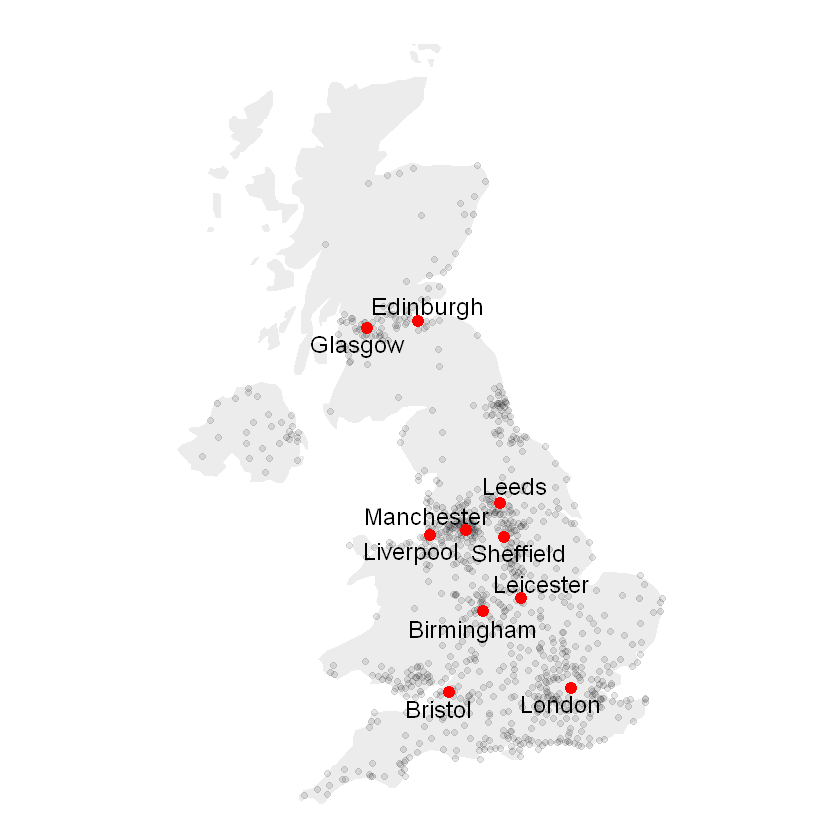

In [23]:
install.packages("maps")
install.packages("mapproj")
# Libraries
library(ggplot2)
library(dplyr)  #dplyr to przede wszystkim zestaw funkcji zaprojektowanych w celu umożliwienia manipulacji 
                #ramkami danych w intuicyjny i przyjazny dla użytkownika sposób
 
library(maps)
UK <- map_data("world") %>% filter(region=="UK")
# Get a data frame with longitude, latitude, and size of bubbles (a bubble = a city)
data <- world.cities %>% filter(country.etc=="UK")
# Second graphic with names of the 10 biggest cities
library(ggrepel)
ggplot() + geom_polygon(data = UK, aes(x=long, y = lat, group = group), fill="grey", alpha=0.3) +  
#draws a country and fills it, group property ensure that boundaries and shapes are connected correctly
geom_point( data=data, aes(x=long, y=lat, alpha=pop)) +
    geom_text_repel( data=data %>% arrange(pop) %>% tail(10), aes(x=long, y=lat, label=name), size=5) +
    geom_point( data=data %>% arrange(pop) %>% tail(10), aes(x=long, y=lat), color="red", size=3) +
    theme_void() + ylim(50,59) + 
#Function To Set The Limits Of The Y Axis.
  coord_map() +
#This coordinate system provides the full range of map projections available in the mapproj package.
  theme(legend.position="none")